In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#Normalizing the font sizes for the plots throughout the notebook
small = 14
meduim = 16
large = 18
plt.rc('font', size=small)          # controls default text sizes
plt.rc('axes', titlesize=small)     # fontsize of the axes title
plt.rc('axes', labelsize=meduim)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
plt.rc('legend', fontsize=small)    # legend fontsize
plt.rc('figure', titlesize=large)   # fontsize of the figure title
color = 'white' 
#Change the color of text in the plot according to your prefrence, 
#I had a dark theme on my notebook, so I set it to 'white'

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0, 20)
a = -1
b = 2
Y = a*X+b
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

In [4]:
print(f'X = \n{X.T}, \nY = \n{Y.T}')

X = 
[[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
   2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
   4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
   7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
   9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
  12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
  14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
  17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
  19.59183673 20.        ]], 
Y = 
[[  2.           1.59183673   1.18367347   0.7755102    0.36734694
   -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
   -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
   -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
   -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
   -8.20408163  -8.6122449   -9.02

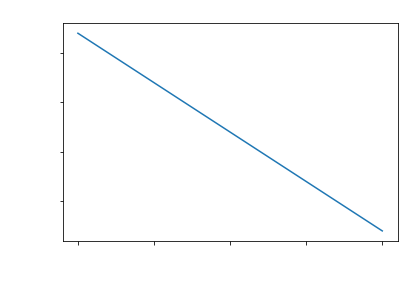

In [5]:
plt.plot(X, Y)
plt.title('X-Y Plot', color=color)
plt.xlabel('X', color=color)
plt.ylabel('Y', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

## Single Variable Dradient Descent

In [6]:
def SVGD(X, Y, alpha, iters, tol):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    
    counter = 0
    list_j=[]
    list_h=[]
    list_thetas=[]
    
    h_theta = theta_0 + (theta_1*x_points)
    list_h.append(h_theta)
    j = (1/(2))*(((h_theta - y_points)**2).mean())
    list_j.append(j)
    j_prime_theta_0 = (h_theta - y_points).mean()
    j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
    theta_0 = theta_0 - (alpha*(j_prime_theta_0))
    theta_1 = theta_1 - (alpha*(j_prime_theta_1))
    thetas = [theta_0, theta_1]
    list_thetas.append(thetas)
    

    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        list_h.append(h_theta)
        #Step 3
        j_old = j
        j = ((1/2)*((h_theta - y_points)**2)).mean()
       # j = (1/(2))*(((h_theta - y_points)**2).mean())
        
        if abs(j - j_old) < 10**-tol:
            break
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (h_theta - y_points).mean()
        j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
        #Step 5
        theta_0 = theta_0 - (alpha*(j_prime_theta_0))
        theta_1 = theta_1 - (alpha*(j_prime_theta_1))

        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)
        

        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \nNumber of iterations = {counter}")
    return list_thetas, list_j, thetas

In [7]:
alpha_SVGD = 1e-2
iters_SVGD = 2000
tol_SVGD = 6
l_thetas_SVGD, l_j_SVGD, thetas_SVGD = SVGD(X, Y, alpha_SVGD, iters_SVGD, tol_SVGD)
y_predicted_SVGD= thetas_SVGD[0] + (thetas_SVGD[1]*X)
l_thetas_SVGD = np.array(l_thetas_SVGD)

r2score_SVGD = r2_score(Y, y_predicted_SVGD)
print(f'r2score_SVGD = {r2score_SVGD}')

theta_0 = 1.961182347373075 
theta_1 = -0.9971125920866307
Cost Function = 0.00019406091444764312 
Number of iterations = 1548
r2score_SVGD = 0.9999888129590495


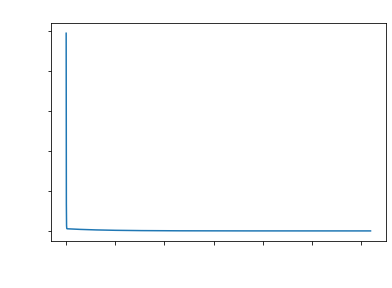

In [8]:
plt.plot(range(len(l_j_SVGD)), l_j_SVGD)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

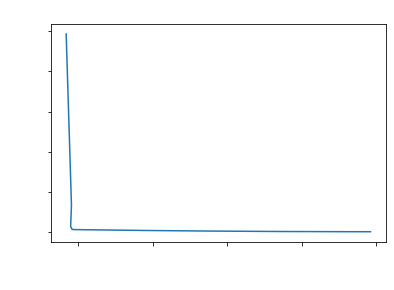

In [9]:
plt.plot(l_thetas_SVGD[:, 0], l_j_SVGD)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

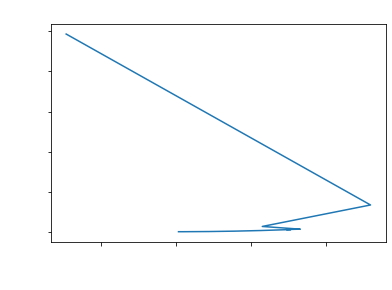

In [10]:
plt.plot(l_thetas_SVGD[:, 1], l_j_SVGD)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

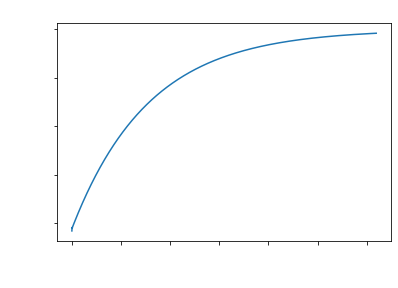

In [11]:
plt.plot(range(l_thetas_SVGD.shape[0]), l_thetas_SVGD[:, 0])
plt.title('Theta_0-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_0', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

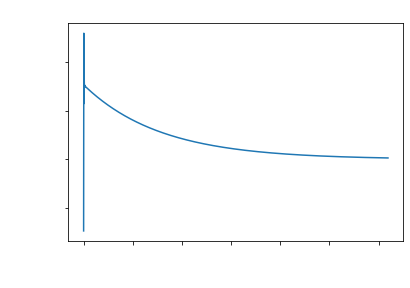

In [12]:
plt.plot(range(l_thetas_SVGD.shape[0]), l_thetas_SVGD[:, 1])
plt.title('Theta_1-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_1', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

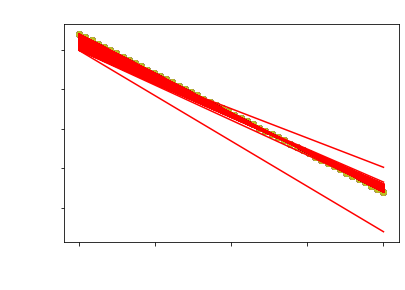

In [13]:
for thetas in l_thetas_SVGD:
    y_predicted = thetas[0] + (thetas[1]*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);

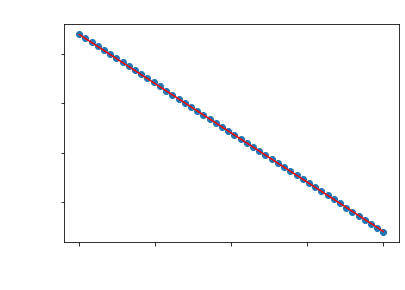

In [14]:
plt.scatter(X, Y)
plt.plot(X, y_predicted_SVGD, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

## Adagrad

In [15]:
def AdaGrad_SVGD(X, Y, alpha, epsilon, iters, tol):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 1
    
    counter = 0
    list_j=[]
    list_h=[]
    list_thetas=[]

    h_theta = theta_0 + (theta_1*x_points)
    list_h.append(h_theta)
    j = ((1/2)*((h_theta - y_points)**2)).mean()
    list_j.append(j)
    j_prime_theta_0 = (h_theta - y_points).mean()
    j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
    v_0 += (j_prime_theta_0**2)
    v_1 += (j_prime_theta_1**2)
    theta_0 -= (alpha / (np.sqrt(v_0) + epsilon))*(j_prime_theta_0)
    theta_1 -= (alpha / (np.sqrt(v_1) + epsilon))*(j_prime_theta_1)
    thetas = [theta_0, theta_1]
    list_thetas.append(thetas)
    
    
    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        list_h.append(h_theta)
        #Step 3
        j_old = j
        j = ((1/2)*((h_theta - y_points)**2)).mean()
        if abs(j - j_old) < 10**-tol:
            break
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (h_theta - y_points).mean()
        j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
        #Step 5
        v_0 = v_0 + (j_prime_theta_0**2)
        v_1 = v_1 + (j_prime_theta_1**2)
        
        theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(j_prime_theta_0)
        theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(j_prime_theta_1)
        
        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)
        
        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \nEpsilon = {epsilon} \nNumber of iterations = {counter}")
    return list_thetas, list_j, thetas

In [16]:
alpha_AdaGrad_SVGD = 0.1
epsilon_AdaGrad_SVGD = 1e-8
iters_AdaGrad_SVGD = 3000
tol_AdaGrad_SVGD = 5
l_thetas_AdaGrad_SVGD, l_j_AdaGrad_SVGD, thetas_AdaGrad_SVGD = AdaGrad_SVGD(X, Y, alpha_AdaGrad_SVGD, epsilon_AdaGrad_SVGD, iters_AdaGrad_SVGD, tol_AdaGrad_SVGD)
y_predicted_AdaGrad_SVGD= thetas_AdaGrad_SVGD[0] + (thetas_AdaGrad_SVGD[1]*X)
l_thetas_AdaGrad_SVGD = np.array(l_thetas_AdaGrad_SVGD)

r2score_AdaGrad_SVGD = r2_score(Y, y_predicted_AdaGrad_SVGD)
print(f'r2score_AdaGrad_SVGD = {r2score_AdaGrad_SVGD}')


theta_0 = 1.80611490588426 
theta_1 = -0.9852627585712392
Cost Function = 0.004849231879951173 
Epsilon = 1e-08 
Number of iterations = 2528
r2score_AdaGrad_SVGD = 0.9997204560445675


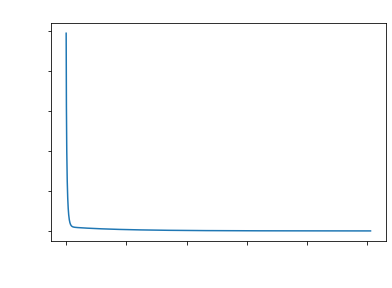

In [17]:
plt.plot(range(len(l_j_AdaGrad_SVGD)), l_j_AdaGrad_SVGD)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

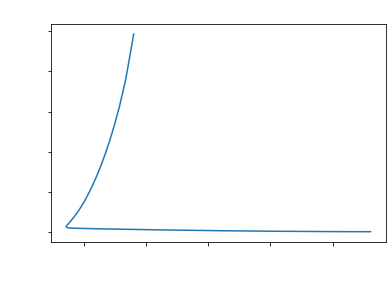

In [18]:
plt.plot(l_thetas_AdaGrad_SVGD[:, 0], l_j_AdaGrad_SVGD)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

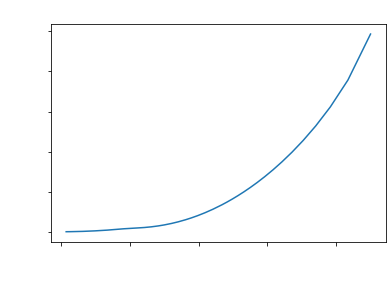

In [19]:
plt.plot(l_thetas_AdaGrad_SVGD[:, 1], l_j_AdaGrad_SVGD)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

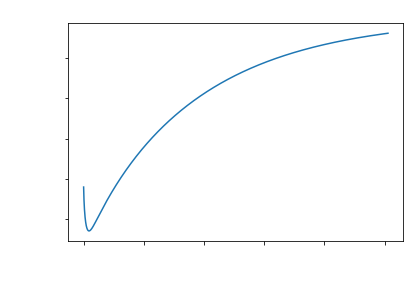

In [20]:
plt.plot(range(l_thetas_AdaGrad_SVGD.shape[0]), l_thetas_AdaGrad_SVGD[:, 0])
plt.title('Theta_0-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_0', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

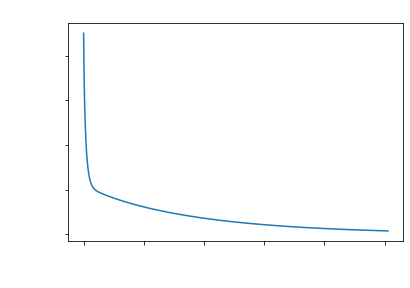

In [21]:
plt.plot(range(l_thetas_AdaGrad_SVGD.shape[0]), l_thetas_AdaGrad_SVGD[:, 1])
plt.title('Theta_1-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_1', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

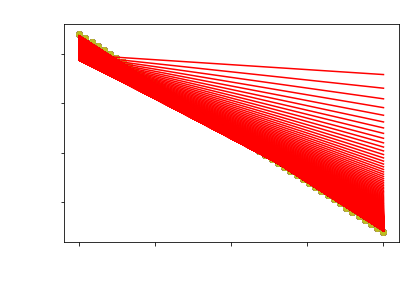

In [22]:
for thetas in l_thetas_AdaGrad_SVGD:
    y_predicted = thetas[0] + (thetas[1]*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);

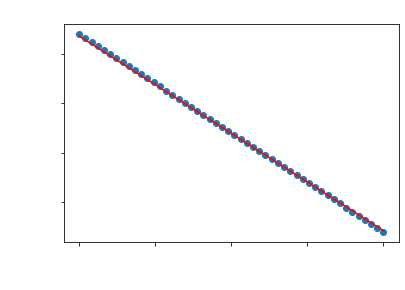

In [23]:
plt.scatter(X, Y)
plt.plot(X, y_predicted_AdaGrad_SVGD, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

## RMSProp

In [24]:
def RMSProp_SVGD(X, Y, alpha, epsilon, beta, iters, tol):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 1
    
    counter = 0
    list_j=[]
    list_h=[]
    list_thetas=[]

    h_theta = theta_0 + (theta_1*x_points)
    list_h.append(h_theta)
    j = ((1/2)*((h_theta - y_points)**2)).mean()
    list_j.append(j)
    j_prime_theta_0 = (h_theta - y_points).mean()
    j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
    v_0 = (beta*v_0) + ((1-beta)*(j_prime_theta_0**2))
    v_1 = (beta*v_1) + ((1-beta)*(j_prime_theta_1**2))
    theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(j_prime_theta_0)
    theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(j_prime_theta_1)
    thetas = [theta_0, theta_1]
    list_thetas.append(thetas)
    
    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        list_h.append(h_theta)
        j_old = j
        #Step 3
        j = ((1/2)*((h_theta - y_points)**2)).mean()
        if abs(j - j_old) < 10**-tol:
            break
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (h_theta - y_points).mean()
        j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
        #Step 5
        v_0 = (beta*v_0) + ((1-beta)*(j_prime_theta_0**2))
        v_1 = (beta*v_1) + ((1-beta)*(j_prime_theta_1**2))
        
        theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(j_prime_theta_0)
        theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(j_prime_theta_1)
        
        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)

        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \nEpsilon = {epsilon} \nBeta = {beta} \nNumber of iterations = {counter}")
    return list_thetas, list_j, thetas

In [25]:
alpha_RMSProp_SVGD = 0.1
epsilon_RMSProp_SVGD = 1e-8
beta_RMSProp_SVGD = 0.95
iters_RMSProp_SVGD = 2000
tol_RMSProp_SVGD = 5
l_thetas_RMSProp_SVGD, l_j_RMSProp_SVGD, thetas_RMSProp_SVGD = RMSProp_SVGD(X, Y, alpha_RMSProp_SVGD, epsilon_RMSProp_SVGD, beta_RMSProp_SVGD, iters_RMSProp_SVGD, tol_RMSProp_SVGD)
y_predicted_RMSProp_SVGD = thetas_RMSProp_SVGD[0] + (thetas_RMSProp_SVGD[1]*X)
l_thetas_RMSProp_SVGD = np.array(l_thetas_RMSProp_SVGD)

r2score_RMSProp_SVGD = r2_score(Y, y_predicted_RMSProp_SVGD)
print(f'r2score_RMSProp_SVGD = {r2score_RMSProp_SVGD}')


theta_0 = 1.9872384209595373 
theta_1 = -0.9984924951117989
Cost Function = 4.209822114484935e-05 
Epsilon = 1e-08 
Beta = 0.95 
Number of iterations = 110
r2score_RMSProp_SVGD = 0.9999975731613693


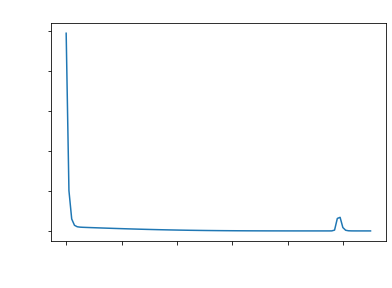

In [26]:
plt.plot(range(len(l_j_RMSProp_SVGD)), l_j_RMSProp_SVGD)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

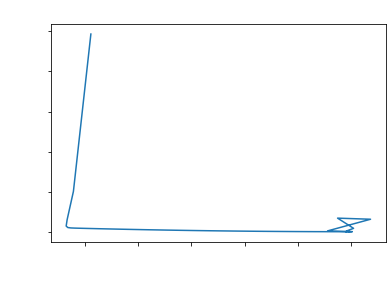

In [27]:
plt.plot(l_thetas_RMSProp_SVGD[:, 0], l_j_RMSProp_SVGD)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

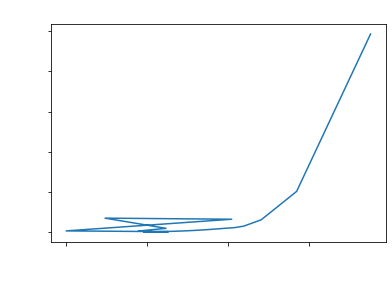

In [28]:
plt.plot(l_thetas_RMSProp_SVGD[:, 1], l_j_RMSProp_SVGD)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

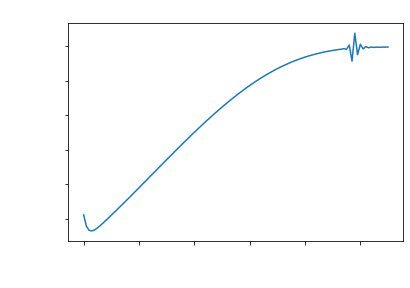

In [29]:
plt.plot(range(l_thetas_RMSProp_SVGD.shape[0]), l_thetas_RMSProp_SVGD[:, 0])
plt.title('Theta_0-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_0', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

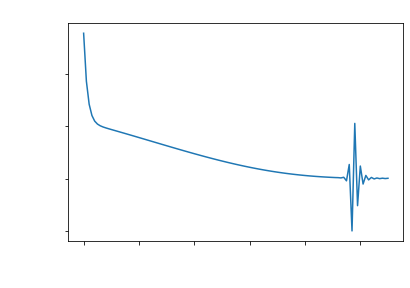

In [30]:
plt.plot(range(l_thetas_RMSProp_SVGD.shape[0]), l_thetas_RMSProp_SVGD[:, 1])
plt.title('Theta_1-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_1', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

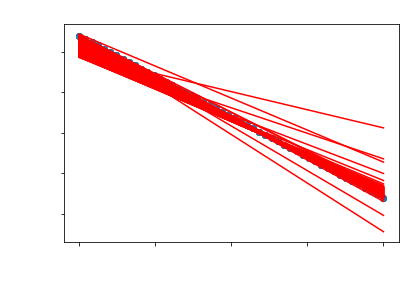

In [31]:
for thetas in l_thetas_RMSProp_SVGD:
    y_predicted = thetas[0] + (thetas[1]*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);

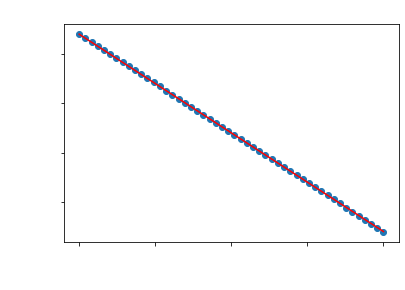

In [32]:
plt.scatter(X, Y)
plt.plot(X, y_predicted_RMSProp_SVGD, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

## ADAM

In [33]:
def ADAM_SVGD(X, Y, alpha, epsilon, beta1, beta2, iters, tol):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 1
    m_0 = 0
    m_1 = 0
    
    counter = 0
    list_j=[]
    list_h=[]
    list_thetas=[]
    
    h_theta = theta_0 + (theta_1*x_points)
    list_h.append(h_theta)
    j = ((1/2)*((h_theta - y_points)**2)).mean()
    list_j.append(j)
    j_prime_theta_0 = (h_theta - y_points).mean()
    j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
    m_0 = (beta1*m_0) + ((1-beta1)*(j_prime_theta_0))
    m_1 = (beta1*m_1) + ((1-beta1)*(j_prime_theta_1))
    v_0 = (beta2*v_0) + ((1-beta2)*(j_prime_theta_0**2))
    v_1 = (beta2*v_1) + ((1-beta2)*(j_prime_theta_1**2))
    theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(m_0)
    theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(m_1)
    thetas = [theta_0, theta_1]
    list_thetas.append(thetas)
        
    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        list_h.append(h_theta)
        j_old = j
        #Step 3
        j = ((1/2)*((h_theta - y_points)**2)).mean()
        if abs(j - j_old) < 10**-tol:
            break
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (h_theta - y_points).mean()
        j_prime_theta_1 = ((h_theta - y_points)*x_points).mean()
        #Step 5
        m_0 = (beta1*m_0) + ((1-beta1)*(j_prime_theta_0))
        m_1 = (beta1*m_1) + ((1-beta1)*(j_prime_theta_1))
        
        v_0 = (beta2*v_0) + ((1-beta2)*(j_prime_theta_0**2))
        v_1 = (beta2*v_1) + ((1-beta2)*(j_prime_theta_1**2))
        if counter > 0:
            
            m_0 = (m_0 / (1 - beta1**counter))
            m_1 = (m_1 / (1 - beta1**counter))

            v_0 = (v_0 / (1 - beta2**counter))
            v_1 = (v_1 / (1 - beta2**counter))
        
        theta_0 = theta_0 - (alpha / (np.sqrt(v_0) + epsilon))*(m_0)
        theta_1 = theta_1 - (alpha / (np.sqrt(v_1) + epsilon))*(m_1)
        
        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)

        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \alpha = {alpha} \nEpsilon = {epsilon} \nBeta1 = {beta1} \nBeta2 = {beta2} \nNumber of iterations = {counter}")
    return list_thetas, list_j, thetas

In [34]:
alpha_ADAM_SVGD = 0.1
epsilon_ADAM_SVGD = 1e-8
beta1_ADAM_SVGD = 0.9
beta2_ADAM_SVGD = 0.9502
iters_ADAM_SVGD = 2000
tol_ADAM_SVGD = 5
l_thetas_ADAM_SVGD, l_j_ADAM_SVGD, thetas_ADAM_SVGD = ADAM_SVGD(X, Y, alpha_ADAM_SVGD, epsilon_ADAM_SVGD, beta1_ADAM_SVGD, beta2_ADAM_SVGD, iters_ADAM_SVGD, tol_ADAM_SVGD)
y_predicted_ADAM_SVGD = thetas_ADAM_SVGD[0] + (thetas_ADAM_SVGD[1]*X)
l_thetas_ADAM_SVGD = np.array(l_thetas_ADAM_SVGD)

r2score_ADAM_SVGD = r2_score(Y, y_predicted_ADAM_SVGD)
print(f'r2score_ADAM_SVGD = {r2score_ADAM_SVGD}')


theta_0 = 2.06376270733467 
theta_1 = -1.0047458245105376
Cost Function = 0.0005236202492339788 lpha = 0.1 
Epsilon = 1e-08 
Beta1 = 0.9 
Beta2 = 0.9502 
Number of iterations = 691
r2score_ADAM_SVGD = 0.9999698148326912


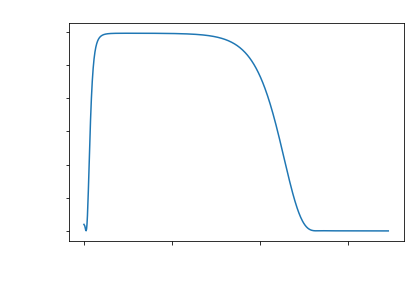

In [35]:
plt.plot(range(len(l_j_ADAM_SVGD)), l_j_ADAM_SVGD)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

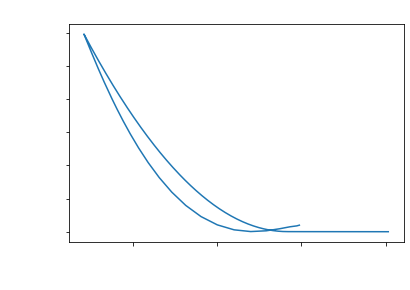

In [36]:
plt.plot(l_thetas_ADAM_SVGD[:, 0], l_j_ADAM_SVGD)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

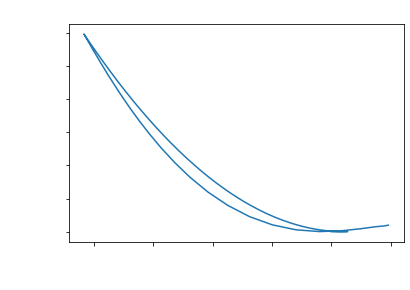

In [37]:
plt.plot(l_thetas_ADAM_SVGD[:, 1], l_j_ADAM_SVGD)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

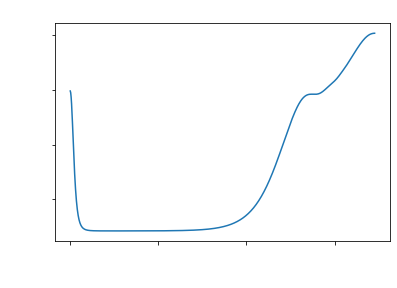

In [38]:
plt.plot(range(l_thetas_ADAM_SVGD.shape[0]), l_thetas_ADAM_SVGD[:, 0])
plt.title('Theta_0-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_0', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

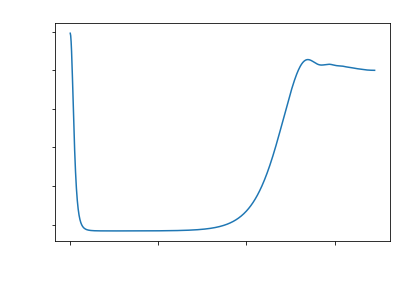

In [39]:
plt.plot(range(l_thetas_ADAM_SVGD.shape[0]), l_thetas_ADAM_SVGD[:, 1])
plt.title('Theta_1-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_1', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

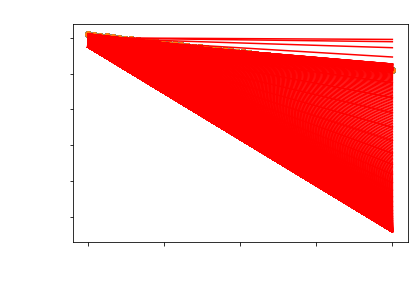

In [40]:
for thetas in l_thetas_ADAM_SVGD:
    y_predicted = thetas[0] + (thetas[1]*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);

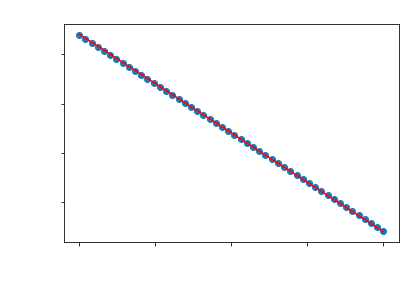

In [41]:
plt.scatter(X, Y)
plt.plot(X, y_predicted_ADAM_SVGD, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);